#### 벤치마크 자료분석
##### 기하 브라운 모형
###### 로그 정규분포 수익률
로그수익률은 정규분포를 따른다.
$t(0<s<t)$ \
$log(\frac{St}{Ss}) = logSt - logSs$

###### 로그 정규분포  값
임의의 시간 $t > 0$에서 $St$의 값은 로그 정규분포를 따른다.

In [174]:
import pandas as pd
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [7]:
# 임의의 기하브라운 운동 모형에 대한 몬테카를로 경로를 생성
def gen_paths(S0, r, sigma, T, M, I):
#     S0 : float = 초기 주가/지수 값
#     r : float = 고정 단기 이자율
#     simga : float = 고정 변동성
#     T : float = 만기
#     M : int = 시간 구간의 수
#     I : int = 생성한 경로의 수
    
#     paths : ndarray, shape(M+1,I)
    dt = float(T)/M
    paths = np.zeros((M+1,I), np.float64)
    paths[0] = 50
    for t in range(1, M+1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t-1]*np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths            

In [8]:
paths = gen_paths(100,0.05,0.5,1.0,50,250000)

In [117]:
pre_r = pd.DataFrame(paths)
print(pre_r.shape[0], pre_r.shape[1])

51 250000


Text(0, 0.5, 'index level')

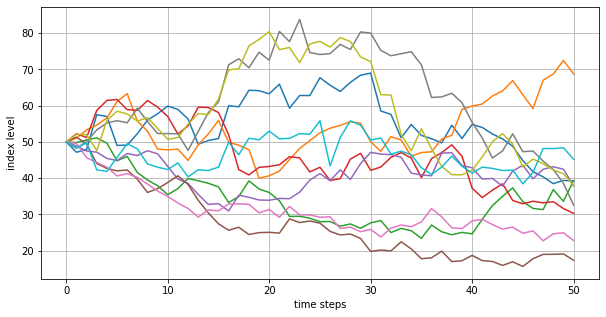

In [189]:
plt.figure(figsize=(10,5))
plt.plot(paths[:,:10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [11]:
log_returns = np.log(paths[1:]/paths[0:-1]) 
# log(S(t+1)/S(t) 

In [54]:
log_returns[:,0].round(4)

array([-0.0581,  0.0157,  0.1826, -0.009 , -0.1504,  0.0015,  0.0622,
        0.0691,  0.031 ,  0.036 , -0.0157, -0.0457, -0.132 ,  0.0207,
        0.0113,  0.1628, -0.0046,  0.0735, -0.002 , -0.0135,  0.0413,
       -0.1058,  0.0573, -0.0003,  0.0755, -0.0311, -0.0267,  0.0389,
        0.0289,  0.0086, -0.1642, -0.0163, -0.1187,  0.0691, -0.0564,
       -0.0178, -0.0228,  0.0936, -0.0694,  0.0732, -0.0154, -0.0337,
       -0.0266, -0.0412, -0.0841, -0.0703, -0.0348, -0.0474,  0.0231,
       -0.0053])

In [98]:
# 자료의 평균(mean), 왜도(skewness), 첨도(kurtosis) 등의 형태출력의 상용자정의함수 생성
def print_statistics(array):
    sta = scs.describe(array)
    print('statistic', 'value')
    print(30 * "-") 
    print('size : ', sta[0])
    print('min : ', sta[1][0].round(5))
    print('mean : ', sta[2].round(5))
    print('std : ', np.sqrt(sta[3]).round(5))
    print('skew : ', round(sta[4], 5))
    print('kurtosis : ', round(sta[5], 5))

In [99]:
print_statistics(log_returns.flatten())
# 각 50개의 time step 에 대한 250000 지수정보에 대하여(flatten) logarithmic scaling 및 
# statistics value 산출

statistic value
------------------------------
size :  12500000
min :  -0.3946
mean :  -0.0015
std :  0.07071
skew :  0.00055
kurtosis :  0.00085


###### 로그 수익률의 히스토그램과 정규분포의 믹도함수

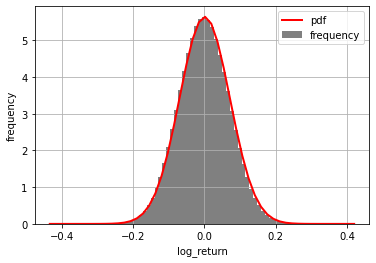

In [169]:
# 로그 수익률 분포와 주어진 r, sigma값에 대한 정규분포 확률밀도함수 비교

# loc= r/M
# scale = sigma/np.sqrt(M)

#     r : float = 고정 단기 이자율
#     simga : float = 고정 변동성
#     M : int = 시간 구간의 수

plt.hist(log_returns.flatten(), bins=70,density=True,label='frequency', color='gray')
plt.grid(True)
plt.xlabel('log_return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc= 0.05 / 50, scale= 0.5 / np.sqrt(50)),
        'r', lw=2.0, label='pdf')
plt.legend()

###### Q - Q Plot
    - 샘플값의 샘플 분위수(quantile)와 정규분포 상의 이론적 분위수를 비교한 것이다.
        > theoretical quantiles to sample quantiles        

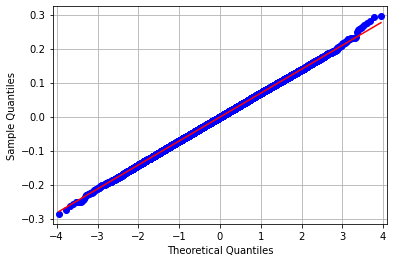

In [198]:
sm.qqplot(log_returns.flatten()[::500],line='s')
plt.grid(True)